In [207]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# RNN implementation with financial data (heelim)
# https://tutorials.pytorch.kr/intermediate/char_rnn_classification_tutorial

In [208]:
!pip install finance-datareader

In [209]:
import torch
import torch.nn as nn
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import datetime

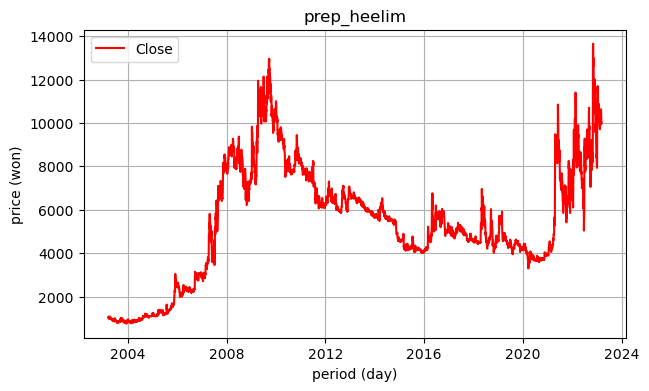

In [304]:
start_date = datetime.datetime.now() - datetime.timedelta(days=365*20)
# 현재 시간으로부터 20년 전 날짜 계산

df_heelim = fdr.DataReader('037440', start_date)

plt.figure(figsize=(7,4))

plt.title('prep_heelim')
plt.ylabel('price (won)')
plt.xlabel('period (day)')
plt.grid()

plt.plot(df_heelim['Close'], label='Close', color='r')
plt.legend(loc='best')

plt.show()

In [305]:
# Normalize
norm_heelim = (df_heelim - df_heelim.min()) / (df_heelim.max() - df_heelim.min())
norm_heelim['Change'] = df_heelim['Change']

In [306]:
print(df_heelim.shape)
print(df_heelim.describe())
print(type(df_heelim))

(4943, 6)
               Open          High           Low         Close        Volume  \
count   4943.000000   4943.000000   4943.000000   4943.000000  4.943000e+03   
mean    5408.484119   5516.271697   5296.061906   5408.688246  2.665008e+05   
std     2665.052722   2729.552645   2601.601220   2659.015208  1.315845e+06   
min      762.000000    809.000000    747.000000    748.000000  0.000000e+00   
25%     3985.500000   4050.000000   3900.000000   3992.500000  6.711500e+03   
50%     5320.000000   5460.000000   5190.000000   5300.000000  2.271400e+04   
75%     7170.000000   7315.500000   7035.000000   7176.000000  7.182200e+04   
max    14160.000000  14850.000000  13250.000000  13650.000000  3.481206e+07   

            Change  
count  4943.000000  
mean      0.000889  
std       0.029970  
min      -0.176119  
25%      -0.009525  
50%       0.000000  
75%       0.008970  
max       0.300000  
<class 'pandas.core.frame.DataFrame'>


In [307]:
norm_heelim.head(5)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2003-03-17,0.021944,0.017876,0.015276,0.021315,0.000221,-0.037629
2003-03-18,0.021272,0.017164,0.019355,0.020772,0.000122,-0.006843
2003-03-19,0.019033,0.016309,0.021595,0.022400,0.000015,0.020669
2003-03-20,0.022093,0.019229,0.024234,0.025810,0.000165,0.042430
2003-03-21,0.023810,0.022007,0.021275,0.025267,0.000383,-0.006475


In [308]:
# Add Result
norm_heelim['Result'] = [1 if c > 0 else 0 for c in list(norm_heelim['Change'])]

# Drop 'Change' column
norm_heelim = norm_heelim.drop(labels="Change", axis=1)
# Drop 'Volume' column
# norm_heelim = norm_heelim.drop(labels='Volume', axis=1)

norm_heelim.describe()

,Open,High,Low,Close,Volume,Result
count,4943.000000,4943.000000,4943.000000,4943.000000,4943.000000,4943.000000
mean,0.346804,0.335252,0.363838,0.361238,0.007655,0.439005
std,0.198914,0.194399,0.208078,0.206093,0.037799,0.496316
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240596,0.230824,0.252179,0.251473,0.000193,0.000000
50%,0.340200,0.331244,0.355355,0.352814,0.000652,0.000000
75%,0.478280,0.463393,0.502919,0.498217,0.002063,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [309]:
norm_heelim.head(20)

,Open,High,Low,Close,Volume,Result
Date,,,,,,
2003-03-17,0.021944,0.017876,0.015276,0.021315,0.000221,0
2003-03-18,0.021272,0.017164,0.019355,0.020772,0.000122,0
2003-03-19,0.019033,0.016309,0.021595,0.022400,0.000015,1
2003-03-20,0.022093,0.019229,0.024234,0.025810,0.000165,1
2003-03-21,0.023810,0.022007,0.021275,0.025267,0.000383,0
2003-03-24,0.023212,0.018802,0.020795,0.020229,0.000071,0
2003-03-25,0.019854,0.015882,0.021675,0.020772,0.000014,1
2003-03-26,0.014554,0.014671,0.016796,0.018292,0.000094,0
2003-03-27,0.017241,0.013104,0.017356,0.018524,0.000044,1


In [310]:
# data_x = norm_heelim[['Open', 'High', 'Low', 'Close']]
data_x = norm_heelim[['Open', 'Close', 'High', 'Low', 'Volume']]
data_y = norm_heelim[['Result']]

print(type(data_x.iloc[0]))
print(data_x.iloc[0])
print(data_x.shape)
print(data_y.shape)
print(data_x.head(5))
print(data_y.head(100))

<class 'pandas.core.series.Series'>
Open      0.021944
Close     0.021315
High      0.017876
Low       0.015276
Volume    0.000221
Name: 2003-03-17 00:00:00, dtype: float64
(4943, 5)
(4943, 1)
                Open     Close      High       Low    Volume
Date                                                        
2003-03-17  0.021944  0.021315  0.017876  0.015276  0.000221
2003-03-18  0.021272  0.020772  0.017164  0.019355  0.000122
2003-03-19  0.019033  0.022400  0.016309  0.021595  0.000015
2003-03-20  0.022093  0.025810  0.019229  0.024234  0.000165
2003-03-21  0.023810  0.025267  0.022007  0.021275  0.000383
            Result
Date              
2003-03-17       0
2003-03-18       0
2003-03-19       1
2003-03-20       1
2003-03-21       0
...            ...
2003-08-04       0
2003-08-05       1
2003-08-06       1
2003-08-07       0
2003-08-08       1

[100 rows x 1 columns]


In [311]:
n_window = 40
n_values = 100
n_params = 5
n_categories = 2 # +, -
n_input_size = n_params * n_values

all_categories = ['DOWN', 'UP']

In [312]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        
        self.hidden_size = hidden_size
        
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden
    
    def initHidden(self):
        return torch.zeros(1, self.hidden_size)
    
n_hidden =128
rnn = RNN(n_input_size, n_hidden, n_categories)

In [313]:
def valueToIndex(v, vi):
    return round(v * 100) + 100 * vi

def valueToTensor(v):
    tensor = torch.zeros(1, n_input_size)
    for i in range(n_params):
        tensor[0][valueToIndex(float(v[i]), i)] = 1
    return tensor

def windowToTensor(wi):
    tensor = torch.zeros(len(wi), 1, n_input_size)
    
    for wii, v in enumerate(wi):
        if isinstance(v, str): continue
        
        for pi in range(n_params):
            tensor[wii][pi][valueToIndex(float(v[pi]), i)] = 1
            
    return tensor

print(data_x.iloc[0])
print(valueToTensor(data_x.iloc[0]))

Open      0.021944
Close     0.021315
High      0.017876
Low       0.015276
Volume    0.000221
Name: 2003-03-17 00:00:00, dtype: float64
tensor([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [314]:
print(data_x[:40])

                Open     Close      High       Low    Volume
Date                                                        
2003-03-17  0.021944  0.021315  0.017876  0.015276  0.000221
2003-03-18  0.021272  0.020772  0.017164  0.019355  0.000122
2003-03-19  0.019033  0.022400  0.016309  0.021595  0.000015
2003-03-20  0.022093  0.025810  0.019229  0.024234  0.000165
2003-03-21  0.023810  0.025267  0.022007  0.021275  0.000383
2003-03-24  0.023212  0.020229  0.018802  0.020795  0.000071
2003-03-25  0.019854  0.020772  0.015882  0.021675  0.000014
2003-03-26  0.014554  0.018292  0.014671  0.016796  0.000094
2003-03-27  0.017241  0.018524  0.013104  0.017356  0.000044
2003-03-28  0.016868  0.022710  0.016665  0.018955  0.000018
2003-03-31  0.020152  0.020772  0.015882  0.018076  0.000014
2003-04-01  0.021720  0.020772  0.017663  0.018076  0.000409
2003-04-02  0.017764  0.017982  0.016523  0.018556  0.000031
2003-04-03  0.021944  0.023020  0.017591  0.023914  0.000010
2003-04-04  0.020824  0.

In [315]:
# input = windowToTensor(data_x.iloc[0])
input = windowToTensor(data_x[:40])
hidden = torch.zeros(1, n_hidden)
# hidden = hidden.unsqueeze(1)

print(input.shape)
print(hidden.shape)


output, next_hidden = rnn(input[0], hidden)

print(output)

torch.Size([40, 1, 500])
torch.Size([1, 128])
tensor([[-0.6892, -0.6971]], grad_fn=<LogSoftmaxBackward0>)


In [316]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

print(categoryFromOutput(output))


('DOWN', 0)


In [317]:
criterion = nn.NLLLoss()

learning_rate = 0.005

def train(category_tensor, wi_tensor):
    hidden = rnn.initHidden()
    
    rnn.zero_grad()
    
    for i in range(wi_tensor.size()[0]):
        output, hidden = rnn(wi_tensor[i], hidden)
    
#     print('** train **')
#     print(output.shape)
#     print(hidden.shape)
#     print(output)
#     print(hidden)
#     print('***********')

        
    loss = criterion(output, category_tensor)
    loss.backward()
    
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)
        
    return output, loss.item()
    

In [319]:
import time
import math

# 20년 전 ~ 최근 6개월 전까지 데이터로 학습
n_iters = len(data_x) - n_window - 30 * 6 - 1
print_every = 50
# print_every = 10
plot_every = 100

current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return f'{m}m {s}s'

start = time.time()

for iter in range(0, n_iters):
#     category, window, category_tensor, window_tensor = randomTrainingExample()
    
#     print(f'iter {iter}')
    
    category_i = data_y.iloc[iter + n_window + 1]['Result']
#     print(f'category_i : {category_i}')    
#     print(type(all_categories))
#     print(all_categories.shape)
#     print(all_categories)
    
    category = all_categories[category_i]
#     print(category)

    window = data_x[iter:iter + n_window]
#     print(window)
    category_tensor = torch.tensor([category_i], dtype=torch.long)
#     print(category_tensor)
    window_tensor = windowToTensor(window)
#     print(window_tensor)
    
    output, loss = train(category_tensor, window_tensor)
    current_loss += loss
    
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = 'V' if guess == category else f'X ({category})'
        print(f'iter: {iter} {iter / n_iters * 100}% ({timeSince(start)})')
        print(f'loss: {loss} / guess: {guess} / correct : {correct}')
        
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

print('TEST DONE.')

iter: 0 0.0% (0m 0.016660690307617188s)
loss: 0.6313541531562805 / guess: DOWN / correct : V
iter: 50 1.058873358746294% (0m 0.5456993579864502s)
loss: 0.7842602729797363 / guess: DOWN / correct : X (UP)
iter: 100 2.117746717492588% (0m 1.1127471923828125s)
loss: 0.6057164072990417 / guess: DOWN / correct : V
iter: 150 3.176620076238882% (0m 1.5201022624969482s)
loss: 0.6124780178070068 / guess: DOWN / correct : V
iter: 200 4.235493434985176% (0m 1.9161977767944336s)
loss: 0.6137636303901672 / guess: DOWN / correct : V
iter: 250 5.29436679373147% (0m 2.3155994415283203s)
loss: 0.7733047604560852 / guess: DOWN / correct : X (UP)
iter: 300 6.353240152477764% (0m 2.7179203033447266s)
loss: 0.5987286567687988 / guess: DOWN / correct : V
iter: 350 7.412113511224058% (0m 3.1061673164367676s)
loss: 0.5678744912147522 / guess: DOWN / correct : V
iter: 400 8.470986869970352% (0m 3.507617950439453s)
loss: 0.5461916923522949 / guess: DOWN / correct : V
iter: 450 9.529860228716645% (0m 3.906181335

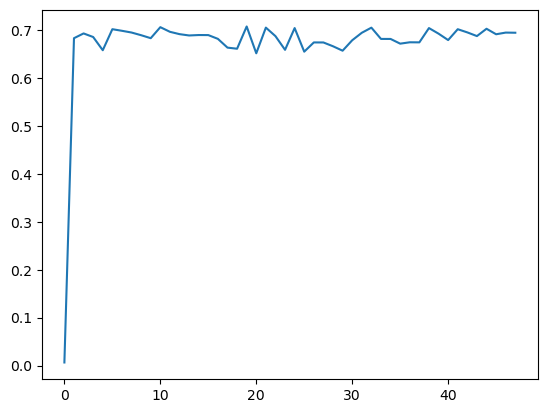

In [320]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)